In [125]:
from astropy.table import Table, Column
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import os
import urllib.request
from scipy.interpolate import interp1d

In [126]:
import astropy.units as u
from astropy.cosmology import z_at_value, FlatLambdaCDM, Planck13

In [127]:
5e6

5000000.0

In [128]:
print("Step: 1")

Step: 1


In [129]:
# This will be the distance of the halo that you selected
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
DistanceOfRS0dot3=cosmo.comoving_distance(0.3)

In [130]:
DistanceOfRS0dot3

<Quantity 1194.39686972 Mpc>

In [131]:
print("Step: 2")

Step: 2


In [132]:
redshift = z_at_value(cosmo.comoving_distance, 5.0095024540353657*u.Mpc)

In [133]:
print(redshift)

0.0011700000000002514


In [134]:
# Set this distance to the halo you selected and add (1194.3969 - OriginalDistance) to the rest of the halos

In [135]:
# Preferable, do the ShellBox first, THEN change the distance to redshift

In [136]:
print("Step: 3")

Step: 3


In [137]:
# Add Doppler redshift to each particle

# ζ d = (Vz/c)*(1/1+ζ cosmo)
# Particle redshift  ζ p = ζ d + ζ cosmo

# We divide the speed of the particle over C (check units) and we multiply by 1 over the sum of 1 plus the
# redshift of the particle

#Then we add this DOppler redshift to the other one (should be zero for the 0.3 redshift halo)

In [138]:
from astropy import constants as const
const.c
Vz=2e8

In [139]:
TotalRedshift = (Vz/const.c)*(1/(1+redshift))

In [140]:
print(TotalRedshift)

0.6663485625780875 s / m


In [141]:
#
#
# Checar unidades de la variable "Redshift" y de "Vz" para que "TotalRedshift" tenga las unidades correctas. 
#
#

In [142]:
print("Step: 4")

Step: 4


In [143]:
# Compute Δθ (Angular separation from halo) and Δ ζ = ζhalo - ζparticle.

In [144]:
#
# se obtendran los angulos con Tan(θ)=CO/CA, donde el CA es la distancia del observador hasta la particula en el 
# eje Z, y CO es la distancia mas corta hasta el eje del observador, es decir sqrt(x^2 + y^2).
#

In [145]:
Halos = np.load("/home/benardorci/SimulationData/halos.npy")
DMP = np.load("/home/benardorci/SimulationData/dm_cat_ds_10000.npy")

In [146]:
np.size(DMP[:,0])

274140

In [214]:
#
#
print("Interpolation")
#
#

Interpolation


In [198]:
x = np.linspace(0.0001, 2250, num=22500, endpoint=True)

In [199]:
print(x)

[1.00000000e-04 1.00104440e-01 2.00108880e-01 ... 2.24979999e+03
 2.24990000e+03 2.25000000e+03]


In [200]:
#import random
#for x in range(10):
 #   print(random.randint(1,100))

In [201]:
yMin = z_at_value(cosmo.comoving_distance, x.min()*u.Mpc)
yMax = z_at_value(cosmo.comoving_distance, x.max()*u.Mpc)
#ygrid = np.logspace(np.log10(yMin), np.log10(yMax), 22500)
ygrid = np.linspace(yMin, yMax, 22500)
DDgrid = cosmo.comoving_distance(ygrid)

#y1 = z_at_value(cosmo.comoving_distance, x.all()*u.Mpc, zmin=999)
#y2 = z_at_value(cosmo.comoving_distance, x.all()*u.Mpc, zmax=5000)

print(yMin)
print(yMax)
print(ygrid)

2.3571964250003736e-08
0.6142083115164456
[2.35719643e-08 2.73229314e-05 5.46222908e-05 ... 6.14153713e-01
 6.14181012e-01 6.14208312e-01]


In [202]:
z_at_value(cosmo.comoving_distance, 1190*u.Mpc)

0.2988035309568695

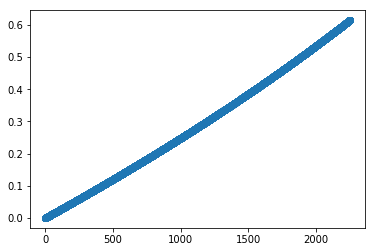

In [203]:
plt.plot(DDgrid, ygrid, 'o')
plt.show()

In [208]:
f = interp1d(DDgrid, ygrid)

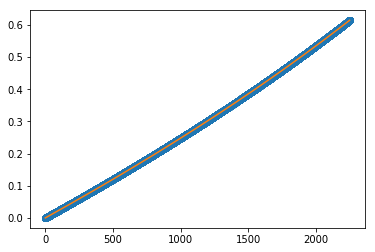

In [209]:
xnew = np.linspace(0.1, 2249, num=2251, endpoint=True)

plt.plot(DDgrid, ygrid, 'o')
plt.plot(xnew, f(xnew), '-')
plt.show()

In [213]:
f(1194)   #LINspace

array(0.29989197)